In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from from_laz_to_csv import laz_to_df

CSV_PATH = "toulouse_capitole.laz"

df = laz_to_df(input_path=CSV_PATH, max_rows=1_000_000)
df = df.drop(['synthetic', 'key_point', 'withheld', 'overlap', 'edge_of_flight_line', 'scanner_channel', 'scan_direction_flag', 'user_data', 'point_source_id', 'gps_time'], axis=1)
# df = df[df['classification'].isin([6, 2, 5, 1])]
df_full = df

Lecture du fichier LAZ : toulouse_capitole.laz
Points disponibles : 47947298
Dimensions trouvées : ['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns', 'synthetic', 'key_point', 'withheld', 'overlap', 'scanner_channel', 'scan_direction_flag', 'edge_of_flight_line', 'classification', 'user_data', 'scan_angle', 'point_source_id', 'gps_time']


,X,Y,Z,intensity,return_number,number_of_returns,classification,scan_angle
0,57421553,627996849,14450,421,1,1,1,-1033
1,57421745,627996797,14353,802,2,2,2,-1045
2,57421780,627996788,14355,1113,1,1,2,-1047
3,57421854,627996768,14356,1219,1,1,2,-1052
4,57421691,627996787,14352,764,2,2,2,-1042
...,...,...,...,...,...,...,...,...
47947293,57438407,627999152,14630,1021,1,1,6,-4735
47947294,57438399,627999212,15290,1004,1,1,6,-4753
47947295,57441085,628000000,15122,856,1,1,6,-4613
47947296,57440153,628000000,14975,962,1,1,6,-4658


In [4]:
df.describe()

,X,Y,Z,intensity,classification,scan_angle
count,4.794730e+07,4.794730e+07,4.794730e+07,4.794730e+07,4.794730e+07,4.794730e+07
mean,5.745318e+07,6.279500e+08,1.547453e+04,8.771602e+02,5.301974e+00,-2.561289e+03
std,2.649628e+04,2.895317e+04,8.507041e+02,2.869716e+02,6.768359e+00,1.372940e+03
min,5.740000e+07,6.279000e+08,1.323100e+04,4.600000e+01,1.000000e+00,-4.913000e+03
25%,5.743415e+07,6.279248e+08,1.460000e+04,6.870000e+02,2.000000e+00,-3.715000e+03
50%,5.745512e+07,6.279500e+08,1.560600e+04,9.240000e+02,6.000000e+00,-2.598000e+03
75%,5.747476e+07,6.279752e+08,1.613600e+04,1.102000e+03,6.000000e+00,-1.509000e+03
max,5.750000e+07,6.280000e+08,1.938200e+04,5.091000e+03,6.700000e+01,3.710000e+02


In [5]:
from from_laz_to_csv import sort_points_by_proximity
df = sort_points_by_proximity(df=df,x=5.745318e+07, y=6.279500e+08, z=1.547453e+04)

,X,Y,Z,intensity,return_number,number_of_returns,classification,scan_angle
0,57453087,627949789,15244,292,1,2,6,-3059
1,57453085,627949781,15240,258,1,2,6,-3060
2,57453050,627949799,15239,632,1,2,6,-3057
3,57453051,627949801,15230,398,1,2,6,-3051
4,57453077,627949771,15242,575,1,2,6,-3059
...,...,...,...,...,...,...,...,...
47947293,57400013,627900038,13256,1585,1,1,9,141
47947294,57400040,627900005,13255,1495,1,1,9,139
47947295,57400021,627900014,13256,1724,1,1,9,149
47947296,57400028,627900000,13250,288,1,1,9,262


In [7]:
df = df.head(300_000)
df

,X,Y,Z,intensity,return_number,number_of_returns,classification,scan_angle
0,57453087,627949789,15244,292,1,2,6,-3059
1,57453085,627949781,15240,258,1,2,6,-3060
2,57453050,627949799,15239,632,1,2,6,-3057
3,57453051,627949801,15230,398,1,2,6,-3051
4,57453077,627949771,15242,575,1,2,6,-3059
...,...,...,...,...,...,...,...,...
299995,57449945,627952557,14772,846,1,1,1,-4095
299996,57455957,627953068,16085,1198,1,1,6,-3243
299997,57456788,627952109,15297,508,2,2,1,-3273
299998,57457200,627950348,14372,686,1,1,2,-3739


In [8]:
y = df.classification
X = df.drop('classification', axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [11]:
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9820333333333333
Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.90      0.92      5638
           2       0.98      0.99      0.99     12010
           3       0.42      0.33      0.37        24
           4       0.73      0.67      0.70        87
           5       0.98      0.98      0.98      1739
           6       0.99      0.99      0.99     40501
          65       0.00      0.00      0.00         1

    accuracy                           0.98     60000
   macro avg       0.72      0.69      0.71     60000
weighted avg       0.98      0.98      0.98     60000



In [ ]:
from main import process_and_visualize_dataframe

# Préparer les données pour la visualisation
X_test['classification'] = y_test.values  # Ajouter les classifications correctes
process_and_visualize_dataframe(X_test, y_test.values, y_pred)

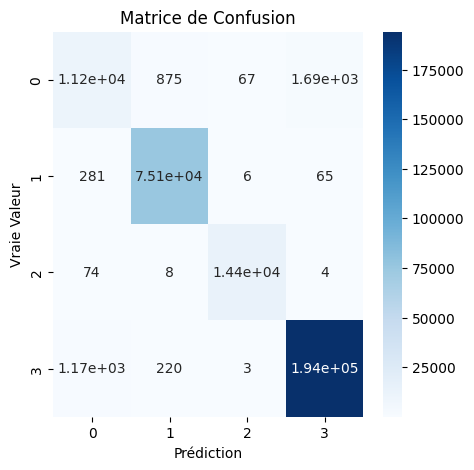

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Graphique de la matrice de confusion
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt=".3g")
plt.title('Matrice de Confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie Valeur')
plt.show()

Accuracy_score du modèle :  0.9999973258206722


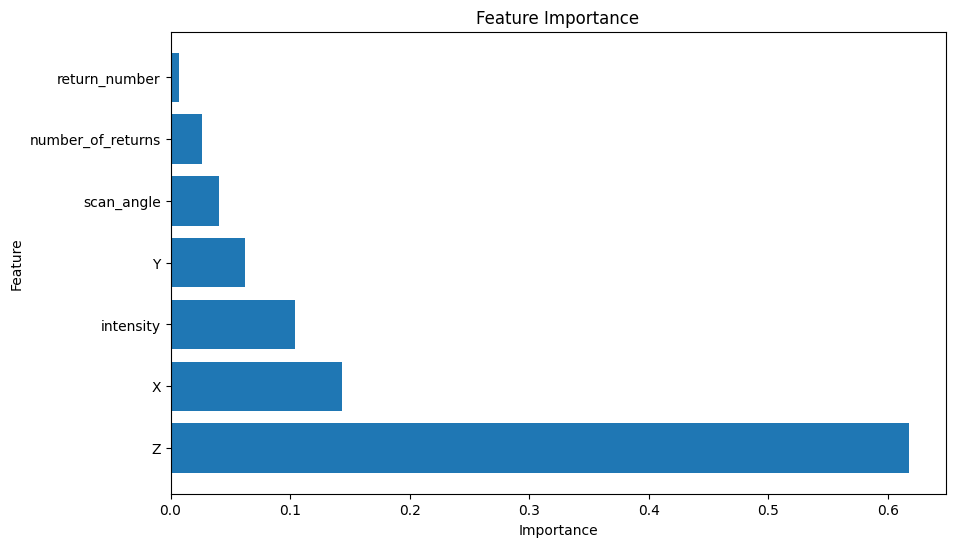

In [67]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

print("Accuracy_score du modèle : ", model.score(X, y))


feature_importances_ = model.feature_importances_
feature = pd.DataFrame({'Features': X.columns, 'Importance': feature_importances_}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature['Features'], feature['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()